In [2]:
import neurokit2 as nk
import signal
from biosppy import storage
from biosppy.signals import ecg 

In [3]:
# load raw ECG signal
signal, mdata = storage.load_txt('./ecg.txt')

In [4]:
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=500)
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=500, method="peak")

In [ ]:
#sample points
import neurokit2 as nk
import signal
from biosppy import storage
from biosppy.signals import ecg 

In [55]:
#rpeaks

In [54]:
#waves_peak ##dict

In [53]:
import numpy as np
f = open('peaks.txt', 'w')
f.write(str(waves_peak))
f.write(str(rpeaks))
f.close()
f = open('peaks.txt', 'r')
data = f.read()
print(data)
f.close()

{'ECG_P_Peaks': [nan, 1052, 1991, 3030, 4051, 5031, 6030, 7069, 8031, 8990, 9989, 11029, 11990, 12969, nan], 'ECG_Q_Peaks': [nan, 1169, 2124, 3158, 4180, 5158, 6163, 7200, 8164, 9122, 10121, 11162, 12123, 13103, nan], 'ECG_S_Peaks': [340, 1262, 2221, 3241, 4262, 5259, 6260, 7300, 8261, 9219, 10200, 11259, 12220, 13199, nan], 'ECG_T_Peaks': [532, 1452, 2410, 3429, 4453, 5431, 6449, 7470, 8451, 9410, 10409, 11449, 12409, 13387, nan], 'ECG_P_Onsets': [nan, 1035, 1973, 2992, 4033, 4993, 6012, 7051, 8013, 8972, 9971, 11011, 11972, 12951, nan], 'ECG_T_Offsets': [594, 1513, 2472, 3512, 4533, 5512, 6511, 7551, 8511, 9471, 10470, 11511, 12471, 13450, nan]}{'method_peaks': 'neurokit', 'method_fixpeaks': 'None', 'ECG_R_Peaks': array([  286,  1206,  2161,  3191,  4212,  5190,  6203,  7233,  8201,
        9160, 10158, 11200, 12161, 13142, 14165]), 'sampling_rate': 500}


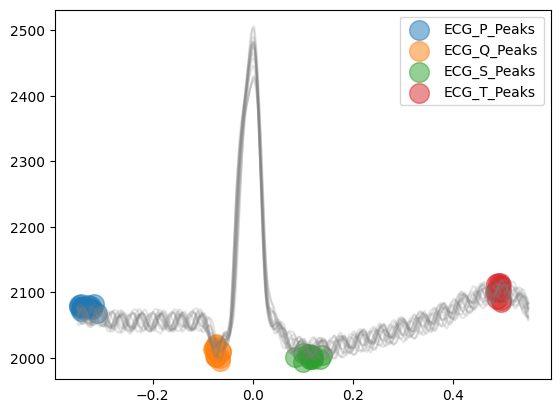

In [7]:
signal_dwt, waves_dwt = nk.ecg_delineate(signal, 
                                        rpeaks, 
                                        sampling_rate=500, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')

In [12]:
import cv2          
import numpy as np     
import matplotlib.pyplot as plt

In [13]:
def x_generate(y_arr):
    x = []
    count = 0
    for i in range(len(y_arr)):
        count = count +1
        x.append(count)
    
    return x

In [17]:
'''x= x_generate(rpeaks)
plt.scatter(x,rpeaks, color= 'blue' , alpha=1, marker='o', s=1)'''

"x= x_generate(rpeaks)\nplt.scatter(x,rpeaks, color= 'blue' , alpha=1, marker='o', s=1)"

In [5]:
import numpy as np
import pandas as pd
#import hampel
import operator

In [ ]:
signal= signal- np.mean(signal) #To center the signal in 0
outlier_indices = hampel(pd.Series(signal), window_size=100, n=3)

peaks = [list(map(itemgetter(1), g)) for k, g in groupby(enumerate(outlier_indices), lambda x: x[0]-x[1])]
peaks_max_vals = [peaks[i][np.argmax(abs(signal[peaks[i]]))] for i in range(len(peaks))]
peaks_sign = np.sign(signal[peaks_max_vals])
diffs_max = np.where((np.diff(peaks_max_vals)<40))[0]
zipped_list = list(zip(signal[peaks_max_vals],peaks_sign,peaks_max_vals))

counter = 0

for i in diffs_max:
    a = i + 1
    if zipped_list[i][0] > zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
        peaks_max_vals.pop(a-counter)
        counter += 1
    if zipped_list[i][0] < zipped_list[a][0] and zipped_list[i][1]==zipped_list[a][1]:
        peaks_max_vals.pop(i-counter)
        counter +=1
    else:
        pass